In [ ]:
# Importing Needed Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Reading Data from google drive
from google.colab import drive 
drive.mount('/content/gdrive')
input_data = pd.read_csv('gdrive/MyDrive/CRO/Sample.csv')

Mounted at /content/gdrive


In [ ]:
input_data.dtypes

NormalMobileNo                                  float64
InvoiceDate                                      object
PaymentDate                                      object
ExpireDate                                       object
TresholdDate                                     object
RegisterDate                                     object
ServiceAmount                                     int64
ServiceType                                      object
DurationBetweenRegisterationAndFirstPurchase      int64
PurchaseLabel                                    object
PurchaseCountAdver                                int64
PurchaseCountCustomer                             int64
PaymentTryCount                                   int64
InvoiceSumOfTotalFee                              int64
InvoiceSumOfTotalPrice                            int64
InvoiceSumOfTotalDiscount                         int64
InvoiceSumOfAdverFee                              int64
InvoiceSumOfAdverPrice                          

In [ ]:
#Converting Data Time data
input_data[["InvoiceDateYear", "InvoiceDateMonth", "InvoiceDateTime"]]=input_data["InvoiceDate"].str.split("-", n=-1, expand=True)
input_data[["PaymentDateYear", "PaymentDateMonth", "PaymentDateTime"]]=input_data["PaymentDate"].str.split("-", n=-1, expand=True)
input_data[["ExpireDateYear", "ExpireDateMonth", "ExpireDateTime"]]=input_data["ExpireDate"].str.split("-", n=-1, expand=True)
input_data[["TresholdDateYear", "TresholdDateMonth", "TresholdDateTime"]]=input_data["TresholdDate"].str.split("-", n=-1, expand=True)
input_data[["RegisterDateYear", "RegisterDateMonth", "RegisterDateTime"]]=input_data["RegisterDate"].str.split("-", n=-1, expand=True)

In [ ]:
#Dropping DateTime columns
input_data=input_data.drop(["NormalMobileNo", 
                            "RegisterDate", 
                            "RegisterDateTime",
                            "InvoiceDate",
                            "InvoiceDateTime",
                            "PaymentDate",
                            "PaymentDateTime",
                            "ExpireDate",
                            "ExpireDateTime",
                            "TresholdDate",
                            "TresholdDateTime"
                              ], axis=1)

In [ ]:
#Handling Missing Data
input_data["FolderCount"]=input_data["FolderCount"].fillna(0)
input_data["FlowAgents"]=input_data["FlowAgents"].fillna("NoOne")
input_data["PaymentDurationsAvg"]=input_data["PaymentDurationsAvg"].fillna(-1)
input_data["PaymentDurationsMax"]=input_data["PaymentDurationsMax"].fillna(-1)
input_data["PaymentDurationsMin"]=input_data["PaymentDurationsMin"].fillna(-1)
input_data["DurationBetweenRegisterationAndFirstPurchase"]=input_data["DurationBetweenRegisterationAndFirstPurchase"].fillna(-1)

In [ ]:
#ِDropping remaining records with missing values
input_data.dropna(inplace=True)

In [102]:
#Importing needed library
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,accuracy_score
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [ ]:
#Preparing Preprossing transformers
preprocessor = ColumnTransformer(
    [
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ServiceType', 'FlowAgents', 'City']),
       
        ('ordinal', OrdinalEncoder(), ["InvoiceDateYear","InvoiceDateMonth","PaymentDateYear",
                                      "PaymentDateMonth","ExpireDateYear","ExpireDateMonth","TresholdDateYear",
                                      "TresholdDateMonth","RegisterDateYear","RegisterDateMonth","HasSatisfactionCall"]),
        ('scaler', StandardScaler(), ['ServiceAmount', 'InvoiceSumOfTotalFee', 'InvoiceSumOfTotalPrice',
                                      "InvoiceSumOfTotalPrice","InvoiceSumOfTotalDiscount","InvoiceSumOfAdverFee",
                                      "InvoiceSumOfAdverPrice","InvoiceSumOfAdverDiscount","InvoiceSumOfCustomerFee",
                                      "InvoiceSumOfCustomerPrice","InvoiceSumOfCustomerDiscount"])
    ],
    remainder = 'passthrough'
)

In [ ]:
import tensorflow as tf

In [132]:
X=input_data.drop("PurchaseLabel", axis=1)
y=input_data["PurchaseLabel"]
X_transformed=preprocessor.fit_transform(X).astype(np.float)
y=np.where(y=="Retention", 1,0).astype(np.float)
X_train, X_test, y_train, y_test=train_test_split(X_transformed, y, test_size=0.2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [133]:
tf.random.set_seed(46)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    # tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model.fit(X_train, y_train, epochs=200, verbose=0)
model.evaluate(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_44/dense_136/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_44/dense_136/embedding_lookup_sparse/Reshape:0", shape=(None, 10), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_44/dense_136/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


16/16 [==============================] - 0s 2ms/step - loss: 0.8332 - accuracy: 0.6247


[0.8332083821296692, 0.6247422695159912]

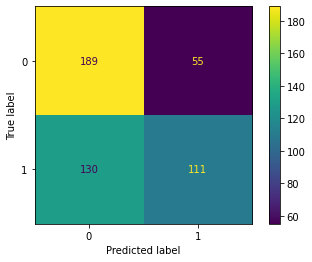

In [ ]:
y_pred=np.where(model.predict(X_test)>=0.5, 1,0)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

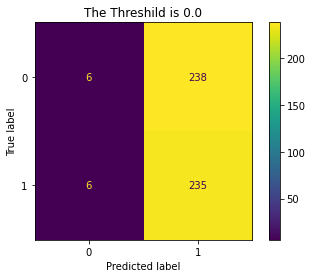

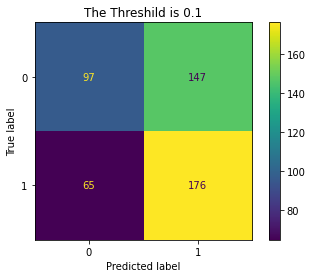

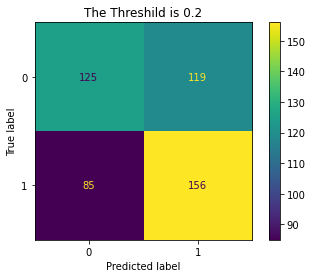

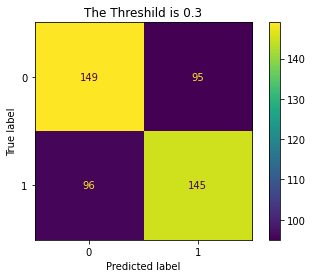

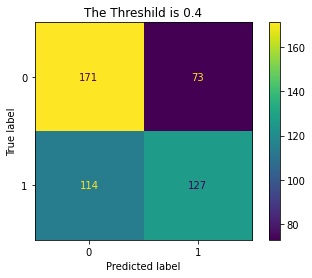

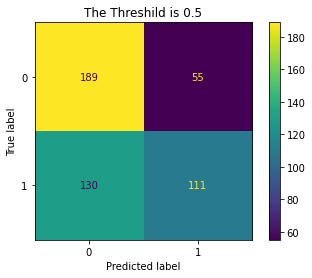

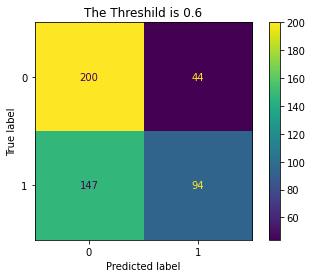

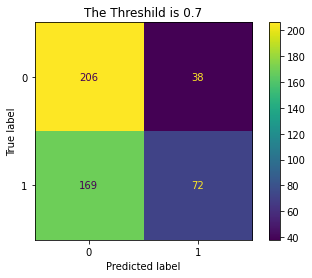

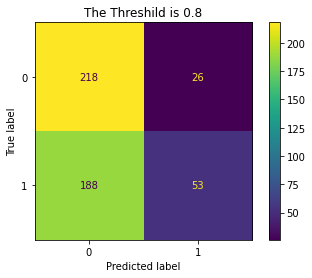

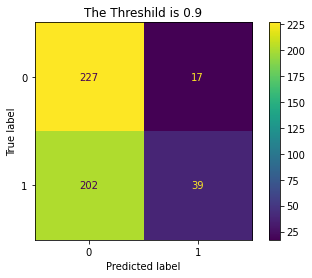

In [ ]:
for i in np.arange(0,1,0.1):
  y_pred = np.where(model.predict(X_test)>=i,1,0)
  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  disp.ax_.set_title(f"The Threshild is {np.round(i,decimals=2)}")

In [108]:
#SVM Model
np.random.seed(46)
X=input_data.drop("PurchaseLabel", axis=1)
y=input_data["PurchaseLabel"]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)
param_dist={"C": 1,
        "kernel":"linear",
        "degree": 3,
        "gamma": 1,
        "coef0": 0,
        "shrinking":True,
        "probability":True}
pipe_svm = Pipeline([
                 ('preprocessing', preprocessor),
                 ('SVM', svm.SVC(**param_dist))
                 ]
        )
pipe_svm.fit(X_train, y_train);

In [109]:
y_pred=pipe_svm.predict(X_test)
accuracy_score(y_pred, y_test)

0.6020618556701031

In [118]:
#XG_Boost
np.random.seed(46)
X=input_data.drop("PurchaseLabel", axis=1)
y=input_data["PurchaseLabel"]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)
pipe_XGB = Pipeline([
                 ('preprocessing', preprocessor),
                 ('lgbm', XGBClassifier())
                 ]
        )
pipe_XGB.fit(X_train, y_train);
y_pred=pipe_XGB.predict(X_test)
accuracy_score(y_pred, y_test)

0.6412371134020619

In [119]:
#Random Forst Classifier
np.random.seed(46)
X=input_data.drop("PurchaseLabel", axis=1)
y=input_data["PurchaseLabel"]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)
pipe_RFC = Pipeline([
                 ('preprocessing', preprocessor),
                 ('lgbm', RandomForestClassifier())
                 ]
        )
pipe_RFC.fit(X_train, y_train);
y_pred=pipe_RFC.predict(X_test)
accuracy_score(y_pred, y_test)

0.6577319587628866